In [1]:
import torch
from excursion_new.learner import Learner
import excursion_new.test_suite.test_functions.fast_2D as testcase_2D
import excursion_new.test_suite.test_functions.fast_1D as testcase_1D

learner_one = Learner(testcase_1D)
learner_two = Learner(testcase_2D)
learner_one.initialize()
learner_two.initialize()

C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\numpy\lib\index_tricks.py:185: ComplexWarning: Casting complex values to real discards the imaginary part
  nn[k] = (nn[k]*step+start)


tensor([[0.1875, 0.8625]], device='cuda:0', dtype=torch.float64)
tensor([[-0.7778]], device='cuda:0', dtype=torch.float64)


C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\distributions\multivariate_normal.py:259: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-10.
  warnings.warn(
C:\Users\excursion\Documents\excursion_project\excursion\excursion_new\plotting.py:131: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k*" (-> color='k'). The keyword argument will take precedence.
  fig_ax1.plot(


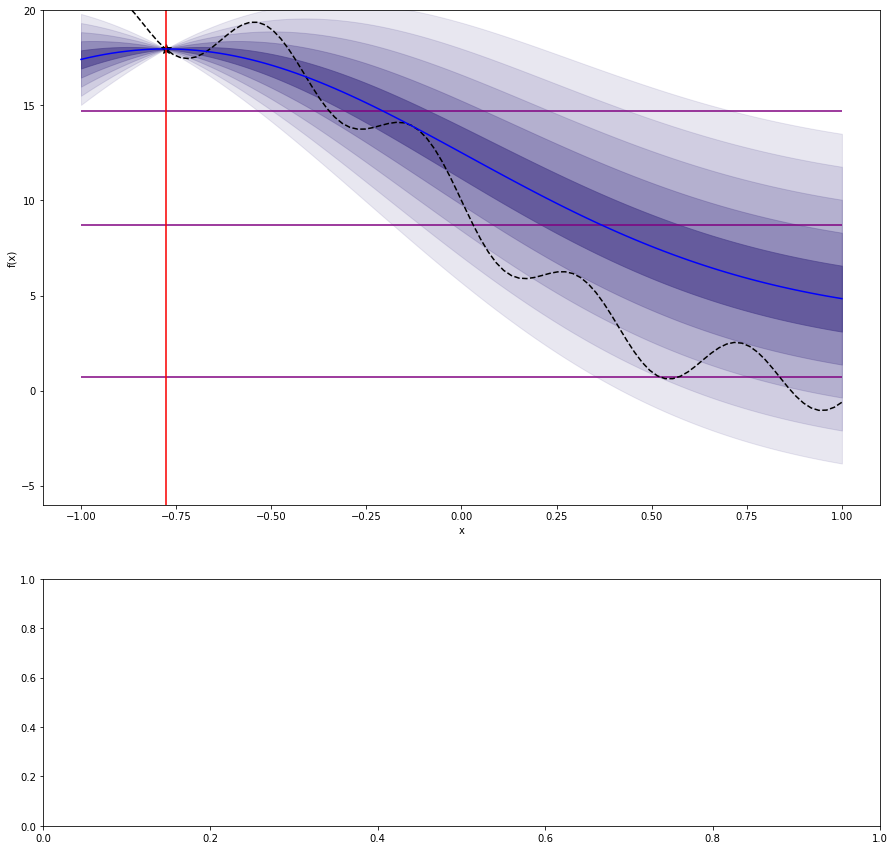

C:\Users\excursion\Documents\excursion_project\excursion\excursion_new\plotting.py:25: UserWarning: The following kwargs were not used by contour: 'linestyle', 'color', 'label'
  line1 = fig_ax1.contour(xv, yv, true_y, thresholds, linestyle="dashed", color='white', label='True Contour')
C:\Users\excursion\Documents\excursion_project\excursion\excursion_new\plotting.py:29: UserWarning: No contour levels were found within the data range.
  line2 = fig_ax1.contour(xv, yv, pred_mean, thresholds, colors="purple", label="threshold")
C:\Users\excursion\Documents\excursion_project\excursion\excursion_new\plotting.py:29: UserWarning: The following kwargs were not used by contour: 'label'
  line2 = fig_ax1.contour(xv, yv, pred_mean, thresholds, colors="purple", label="threshold")


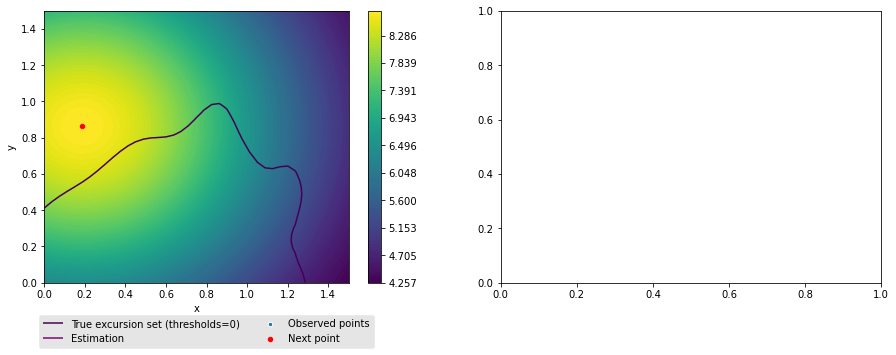

tensor([[0.1875, 0.7875]], device='cuda:0', dtype=torch.float64)
tensor([[-0.5354]], device='cuda:0', dtype=torch.float64)


C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\distributions\multivariate_normal.py:259: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-10.
  warnings.warn(
C:\Users\excursion\Documents\excursion_project\excursion\excursion_new\plotting.py:131: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k*" (-> color='k'). The keyword argument will take precedence.
  fig_ax1.plot(


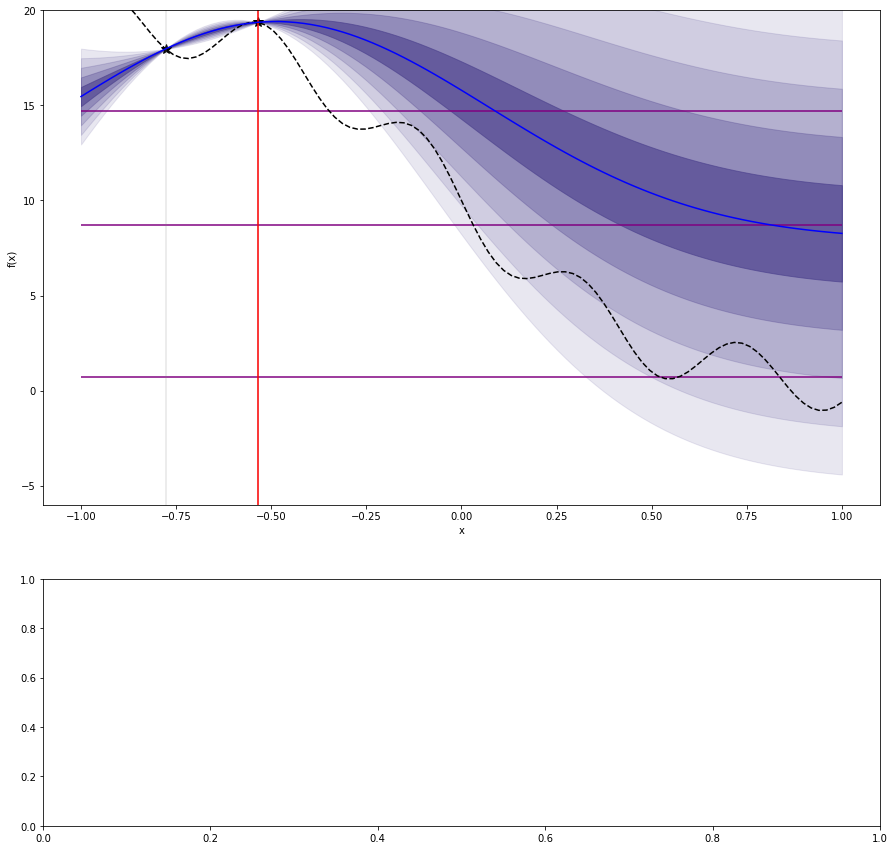

C:\Users\excursion\Documents\excursion_project\excursion\excursion_new\plotting.py:25: UserWarning: The following kwargs were not used by contour: 'linestyle', 'color', 'label'
  line1 = fig_ax1.contour(xv, yv, true_y, thresholds, linestyle="dashed", color='white', label='True Contour')
C:\Users\excursion\Documents\excursion_project\excursion\excursion_new\plotting.py:29: UserWarning: No contour levels were found within the data range.
  line2 = fig_ax1.contour(xv, yv, pred_mean, thresholds, colors="purple", label="threshold")
C:\Users\excursion\Documents\excursion_project\excursion\excursion_new\plotting.py:29: UserWarning: The following kwargs were not used by contour: 'label'
  line2 = fig_ax1.contour(xv, yv, pred_mean, thresholds, colors="purple", label="threshold")


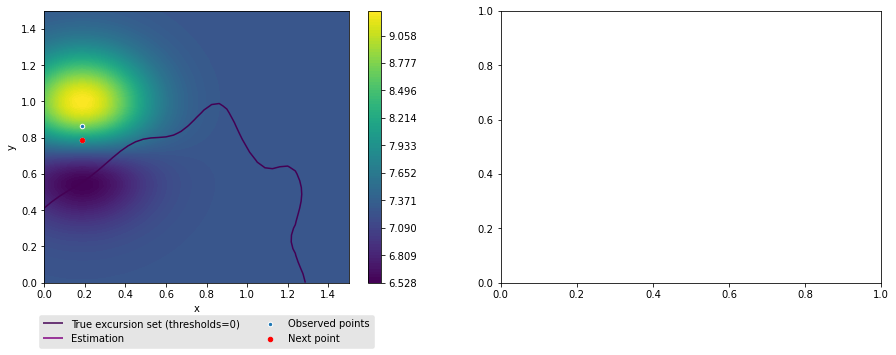

tensor([[0.1875, 0.7875]], device='cuda:0', dtype=torch.float64)
tensor([[-0.5354]], device='cuda:0', dtype=torch.float64)


C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\utils\cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\distributions\multivariate_normal.py:259: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-10.
  warnings.warn(
C:\Users\excursion\Documents\excursion_project\excursion\excursion_new\plotting.py:131: UserWarning: color is redundantly defined by the 'c

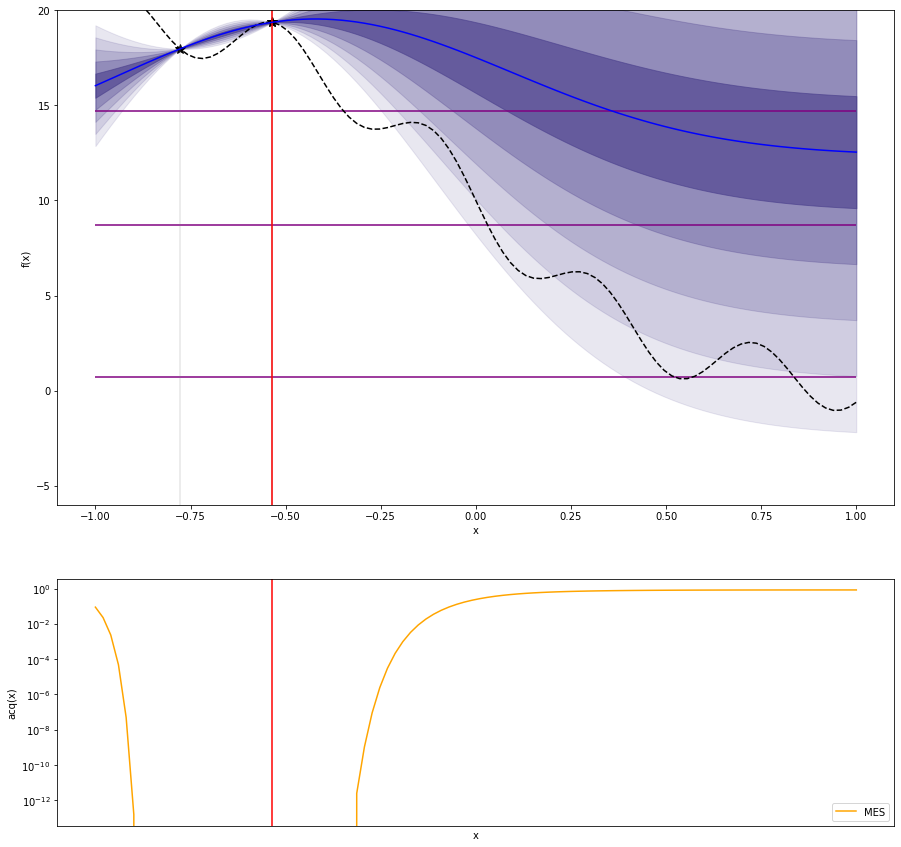

C:\Users\excursion\Documents\excursion_project\excursion\excursion_new\plotting.py:25: UserWarning: The following kwargs were not used by contour: 'linestyle', 'color', 'label'
  line1 = fig_ax1.contour(xv, yv, true_y, thresholds, linestyle="dashed", color='white', label='True Contour')
C:\Users\excursion\Documents\excursion_project\excursion\excursion_new\plotting.py:29: UserWarning: No contour levels were found within the data range.
  line2 = fig_ax1.contour(xv, yv, pred_mean, thresholds, colors="purple", label="threshold")
C:\Users\excursion\Documents\excursion_project\excursion\excursion_new\plotting.py:29: UserWarning: The following kwargs were not used by contour: 'label'
  line2 = fig_ax1.contour(xv, yv, pred_mean, thresholds, colors="purple", label="threshold")
C:\Users\excursion\Documents\excursion_project\excursion\excursion_new\plotting.py:75: UserWarning: The following kwargs were not used by contour: 'linestyle', 'color', 'label'
  line_ = fig_ax1.contour(xv, yv, true_y, 

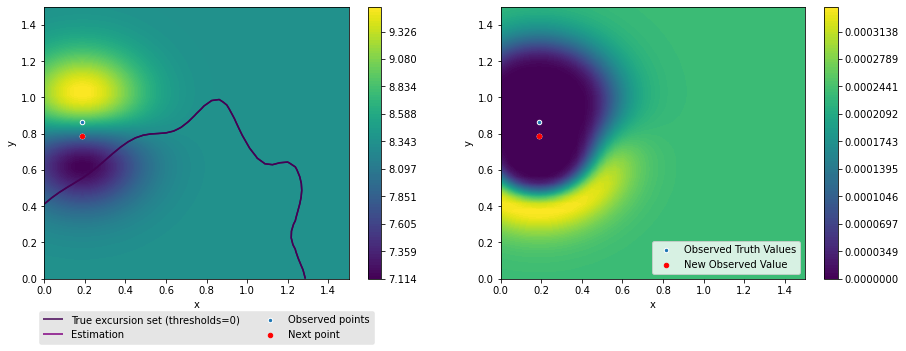

tensor([[0.1500, 0.3750]], device='cuda:0', dtype=torch.float64)
tensor([[1.]], device='cuda:0', dtype=torch.float64)


C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\utils\cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\distributions\multivariate_normal.py:259: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-10.
  warnings.warn(
C:\Users\excursion\Documents\excursion_project\excursion\excursion_new\plotting.py:131: UserWarning: color is redundantly defined by the 'c

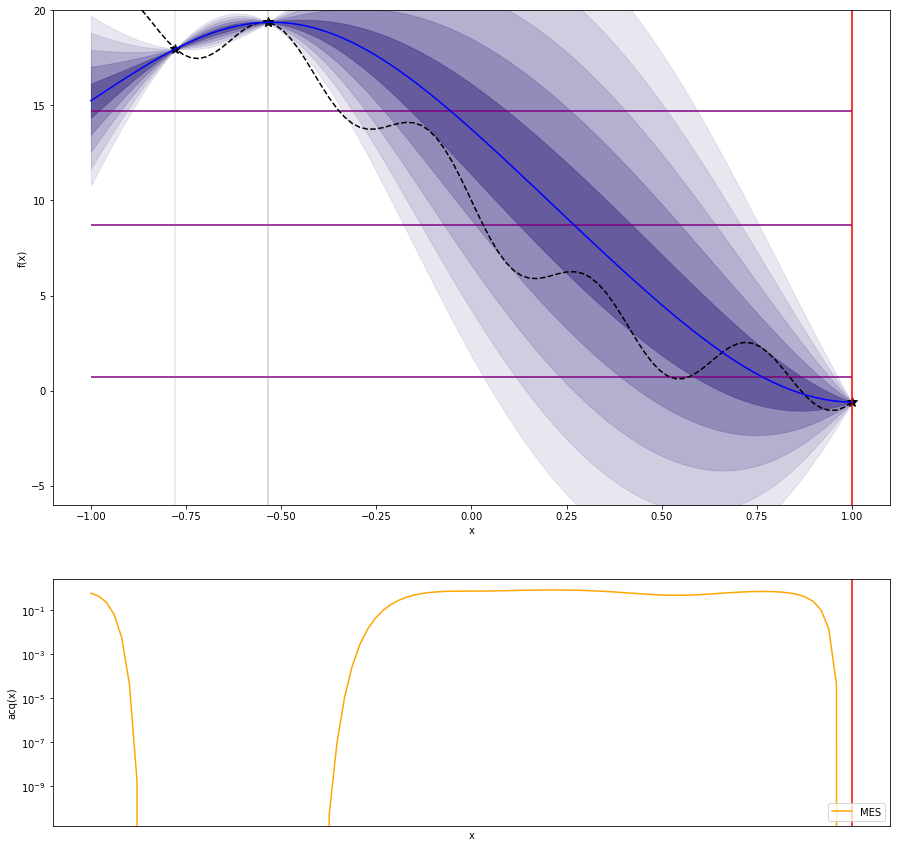

C:\Users\excursion\Documents\excursion_project\excursion\excursion_new\plotting.py:25: UserWarning: The following kwargs were not used by contour: 'linestyle', 'color', 'label'
  line1 = fig_ax1.contour(xv, yv, true_y, thresholds, linestyle="dashed", color='white', label='True Contour')
C:\Users\excursion\Documents\excursion_project\excursion\excursion_new\plotting.py:29: UserWarning: The following kwargs were not used by contour: 'label'
  line2 = fig_ax1.contour(xv, yv, pred_mean, thresholds, colors="purple", label="threshold")
C:\Users\excursion\Documents\excursion_project\excursion\excursion_new\plotting.py:75: UserWarning: The following kwargs were not used by contour: 'linestyle', 'color', 'label'
  line_ = fig_ax1.contour(xv, yv, true_y, thresholds, linestyle="dashed", color='white', label='True Contour')


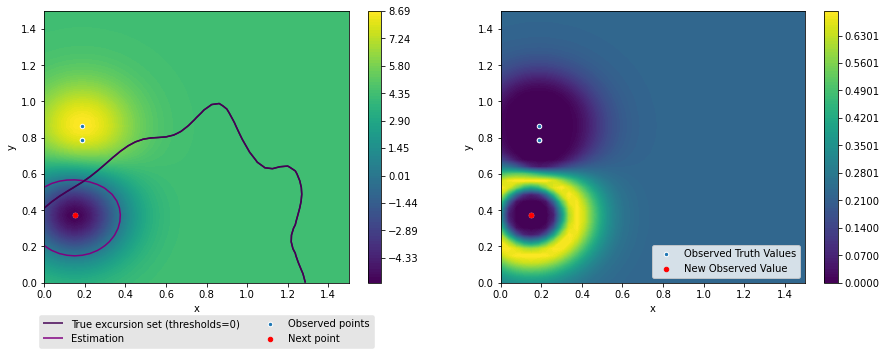

tensor([[0.3750, 0.3750]], device='cuda:0', dtype=torch.float64)
tensor([[0.2121]], device='cuda:0', dtype=torch.float64)


C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\utils\cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\distributions\multivariate_normal.py:259: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-10.
  warnings.warn(
C:\Users\excursion\Documents\excursion_project\excursion\excursion_new\plotting.py:131: UserWarning: color is redundantly defined by the 'c

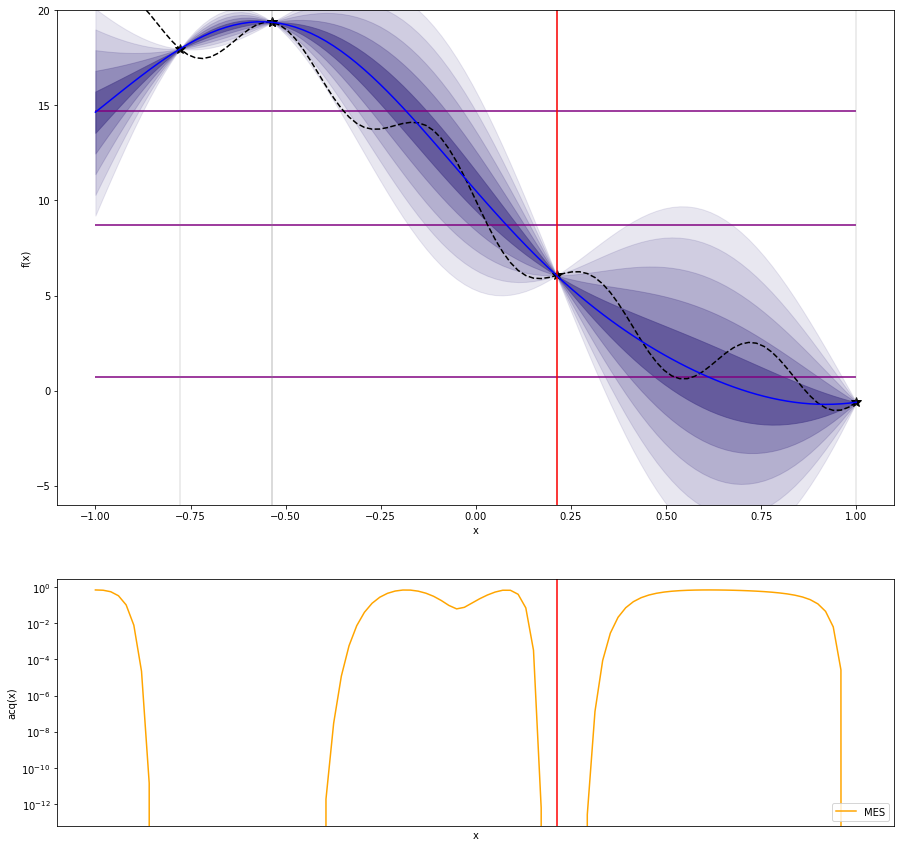

C:\Users\excursion\Documents\excursion_project\excursion\excursion_new\plotting.py:25: UserWarning: The following kwargs were not used by contour: 'linestyle', 'color', 'label'
  line1 = fig_ax1.contour(xv, yv, true_y, thresholds, linestyle="dashed", color='white', label='True Contour')
C:\Users\excursion\Documents\excursion_project\excursion\excursion_new\plotting.py:29: UserWarning: The following kwargs were not used by contour: 'label'
  line2 = fig_ax1.contour(xv, yv, pred_mean, thresholds, colors="purple", label="threshold")
C:\Users\excursion\Documents\excursion_project\excursion\excursion_new\plotting.py:75: UserWarning: The following kwargs were not used by contour: 'linestyle', 'color', 'label'
  line_ = fig_ax1.contour(xv, yv, true_y, thresholds, linestyle="dashed", color='white', label='True Contour')


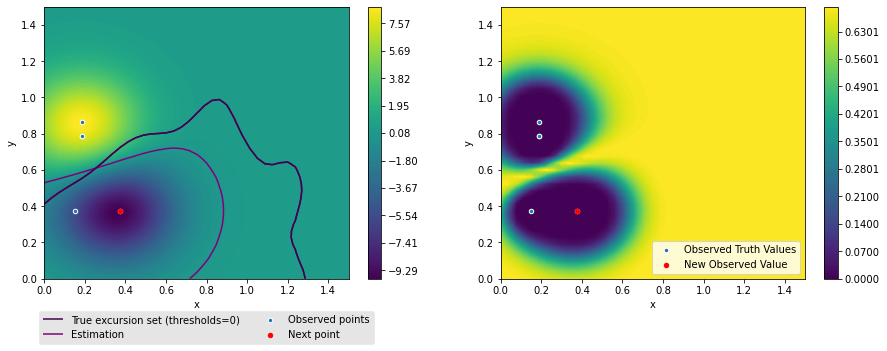

tensor([[0.8250, 0.6000]], device='cuda:0', dtype=torch.float64)
tensor([[0.6162]], device='cuda:0', dtype=torch.float64)


C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\utils\cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\distributions\multivariate_normal.py:259: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-10.
  warnings.warn(
C:\Users\excursion\Documents\excursion_project\excursion\excursion_new\plotting.py:131: UserWarning: color is redundantly defined by the 'c

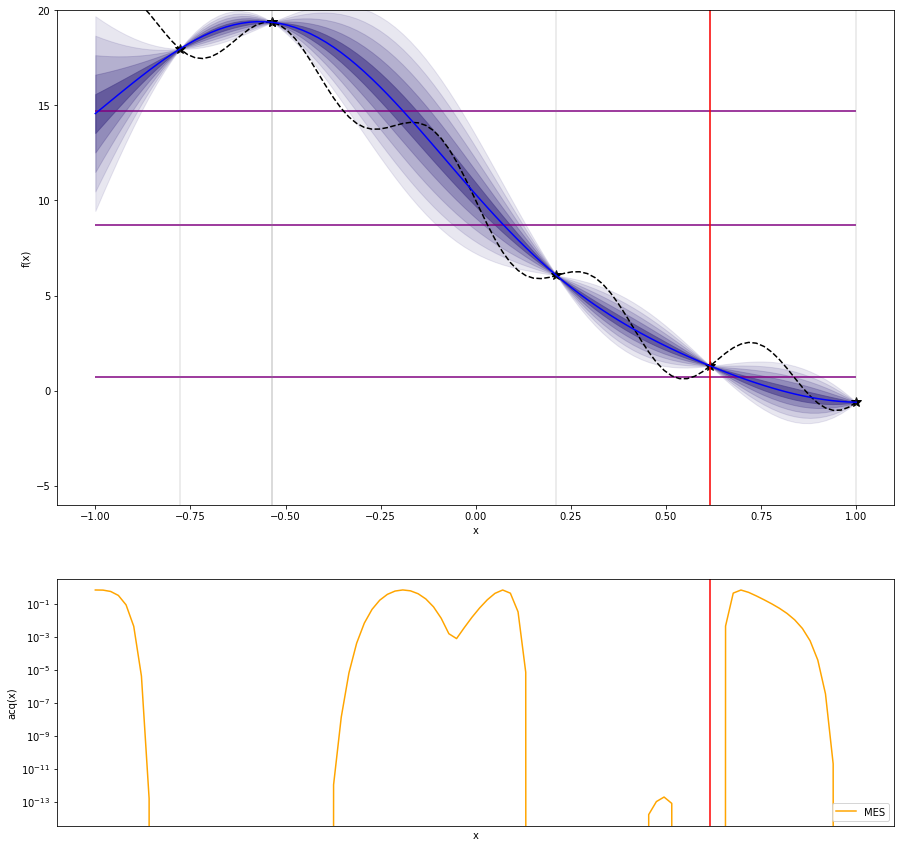

C:\Users\excursion\Documents\excursion_project\excursion\excursion_new\plotting.py:25: UserWarning: The following kwargs were not used by contour: 'linestyle', 'color', 'label'
  line1 = fig_ax1.contour(xv, yv, true_y, thresholds, linestyle="dashed", color='white', label='True Contour')
C:\Users\excursion\Documents\excursion_project\excursion\excursion_new\plotting.py:29: UserWarning: The following kwargs were not used by contour: 'label'
  line2 = fig_ax1.contour(xv, yv, pred_mean, thresholds, colors="purple", label="threshold")
C:\Users\excursion\Documents\excursion_project\excursion\excursion_new\plotting.py:75: UserWarning: The following kwargs were not used by contour: 'linestyle', 'color', 'label'
  line_ = fig_ax1.contour(xv, yv, true_y, thresholds, linestyle="dashed", color='white', label='True Contour')


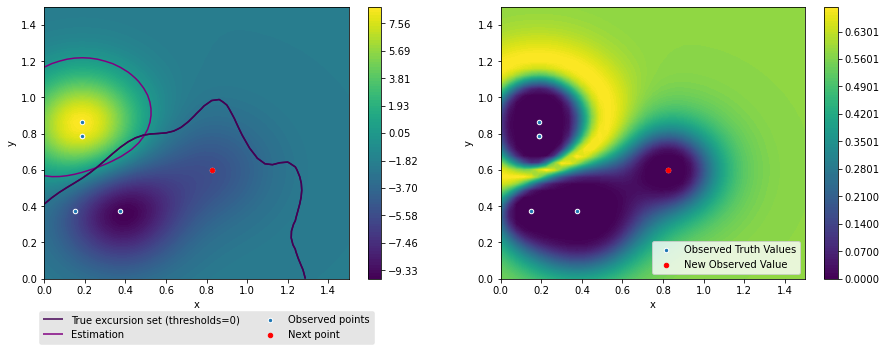

In [2]:
for iteration in range(6):
    x_one = learner_one.suggest()
    x_two = learner_two.suggest()
    print(x_two)
    print(x_one)
    result_one = learner_one.evaluate_and_tell(x_one)
    result_two = learner_two.evaluate_and_tell(x_two)
    result_one.plot()
    result_two.plot()

In [3]:
import excursion_new.test_suite.test_functions.fast_3D as testcase_3D
learner_three = Learner(testcase_3D)
learner_three.initialize()

C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\numpy\lib\index_tricks.py:185: ComplexWarning: Casting complex values to real discards the imaginary part
  nn[k] = (nn[k]*step+start)


In [4]:
for iteration in range(6):
    x_three = learner_three.suggest()
    print(x_three)
    result_three = learner_three.evaluate_and_tell(x_three)
    #result_three.plot()

C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\distributions\multivariate_normal.py:259: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-10.
  warnings.warn(


tensor([[0.3750, 0.8250, 0.1125]], device='cuda:0', dtype=torch.float64)
tensor([[0.9000, 1.1625, 0.6375]], device='cuda:0', dtype=torch.float64)


C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\utils\cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)


tensor([[0.9000, 1.1625, 0.6375]], device='cuda:0', dtype=torch.float64)
tensor([[0.0375, 0.7125, 0.0000]], device='cuda:0', dtype=torch.float64)
tensor([[0.4875, 0.9375, 0.1875]], device='cuda:0', dtype=torch.float64)
tensor([[0.5250, 0.6750, 0.1125]], device='cuda:0', dtype=torch.float64)
